In [6]:
import cv2
import os
from tqdm import tqdm
import pandas as pd
from glob import glob

In [2]:
!ls ../input/SAINT-GALL/saintgalldb-v1.0

README.txt  data  ground_truth	sets


In [3]:
!ls ../input/SAINT-GALL/saintgalldb-v1.0/sets

test.txt  train.txt  valid.txt


In [4]:
train_ids = [
    image_id.strip() for image_id in open('../input/SAINT-GALL/saintgalldb-v1.0/sets/train.txt').readlines()
]
valid_ids = [
    image_id.strip() for image_id in open('../input/SAINT-GALL/saintgalldb-v1.0/sets/valid.txt').readlines()
]
test_ids = [
    image_id.strip() for image_id in open('../input/SAINT-GALL/saintgalldb-v1.0/sets/test.txt').readlines()
]

len(train_ids), len(valid_ids), len(test_ids)

(20, 10, 30)

In [7]:
os.makedirs('prepared_datasets', exist_ok=True)
!rm -rf 'prepared_datasets/saintgall'
os.makedirs('prepared_datasets/saintgall', exist_ok=True)
os.makedirs('prepared_datasets/saintgall/images', exist_ok=True)

In [9]:
marking = []

lines = open('../input/SAINT-GALL/saintgalldb-v1.0/ground_truth/transcription.txt').readlines()
for line in tqdm(lines):
    sample_id, text, _ = line.split()
    text = text.replace('-', '').replace('|', ' ').strip()
    page_id = '-'.join(sample_id.split('-')[:2])

    if page_id in train_ids:
        stage = 'train'
    elif page_id in valid_ids:
        stage = 'valid'
    elif page_id in test_ids:
        stage = 'test'
    else:
        stage = 'unknown'
    
    marking.append({
        'sample_id': sample_id,
        'path': f'saintgall/images/{sample_id}.png',
        'stage': stage,
        'text': text,
    })
    
    !cp '../input/SAINT-GALL/saintgalldb-v1.0/data/line_images_normalized/{sample_id}.png' 'prepared_datasets/saintgall/images/{sample_id}.png'
    
    
marking = pd.DataFrame(marking).set_index('sample_id')
marking['stage'].value_counts()

100%|██████████| 1410/1410 [04:40<00:00,  5.02it/s]


test     707
train    468
valid    235
Name: stage, dtype: int64

In [19]:
len(glob(f'./prepared_datasets/saintgall/images/*.png')), marking.shape[0]

(1410, 1410)

sample_id: csg562-035-22
text: gendam plebem fidelium sit idoneus et ad gubernandum eclam
image_shape: (120, 1926, 3)


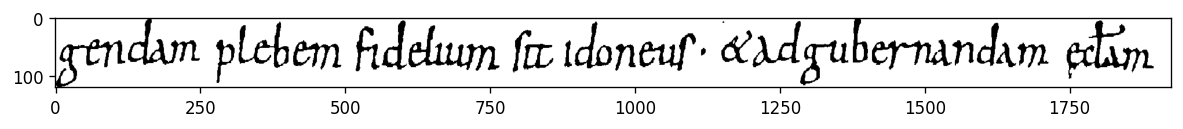

In [22]:
import matplotlib.pyplot as plt

idx = 777

sample = marking.iloc[idx]
text = sample['text']
image = cv2.imread(f'./prepared_datasets/{sample["path"]}')

print('sample_id:', sample.name)
print('text:', text)
print('image_shape:', image.shape)

plt.figure(num=None, figsize=(12, 3), dpi=120, facecolor='w', edgecolor='k')
plt.imshow(image);

In [12]:
marking.to_csv('./prepared_datasets/saintgall/marking.csv')

In [13]:
!cd ./prepared_datasets && ls saintgall

images	marking.csv


In [14]:
!cd ./prepared_datasets && tar -czvf saintgall.tar.gz saintgall > /dev/null

In [16]:
!du -sh ./prepared_datasets/saintgall.tar.gz

5.3M	./prepared_datasets/saintgall.tar.gz
